Prompt Text:

0


Binary Tree:

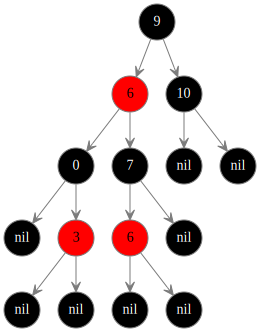

s
0
s
0
s
0
i
9
new_node.parent.val = 0
self.val in 0 in insert
0
i
10
new_node.parent.val = 9
Went to right in the first condition
new_node.parent.parent.val = 0
rotating left
root is changing
self.val = 9
self.val = 9 in rb_fixup
self.val in 9 in insert
0
i
7
new_node.parent.val = 0
Went to left in the first condition
self.val in 9 in insert
0
i
6
new_node.parent.val = 7
Went to right in the first condition
rotating right
Went to right in the first condition
new_node.parent.parent.val = 0
rotating left
self.val = 9 in rb_fixup
self.val in 9 in insert
0
i
3
new_node.parent.val = 0
Went to left in the first condition
self.val in 9 in insert
0
i
6
new_node.parent.val = 7
self.val in 9 in insert
0


In [ ]:
import algviz
import sys

class rb_node(algviz.BinaryTreeNode):
    def __init__(self, value = None, left = None, right = None, color=None, parent=None):
        super().__init__(value, left, right)
        self.parent = parent
        self.color = color
        
    def rb_insert(self, rb_tree, new_node):
            # root.right.val = 1
            # root.right.right = algviz.BinaryTreeNode('nil')
            # root.right.left = algviz.BinaryTreeNode('nil')
        parent_node = None
        search_node = self
        while 1:
            parent_node = search_node
            rb_tree.markNode(algviz.color_light_blue, search_node, hold=False)
            viz.display()
            if new_node.val < search_node.val:
                if str(search_node.left.val) == nil_node_val:
                    rb_tree.markNode(algviz.color_light_blue, search_node.left, hold=False)
                    viz.display(delay=0.5)
                    new_node.parent = parent_node
                    prev_left = search_node.left
                    prev_left.parent = None
                    search_node.left = new_node
                    rb_tree.removeNode(prev_left)
                    rb_tree.markNode(algviz.color_black, new_node, hold=True)
                    rb_tree.markNode(algviz.color_black, new_node.right, hold=True)
                    rb_tree.markNode(algviz.color_black, new_node.left, hold=True)
                    viz.display(delay=0.5)
                    break
                search_node = search_node.left
            else:
                if str(search_node.right.val) == nil_node_val:
                    rb_tree.markNode(algviz.color_light_blue, search_node.right, hold=False)
                    viz.display()
                    new_node.parent = parent_node
                    # print(f'parent_node.val = {parent_node.val}')
                    prev_right = search_node.right
                    prev_right.parent = None
                    search_node.right = new_node
                    rb_tree.removeNode(prev_right)
                    rb_tree.markNode(algviz.color_black, new_node, hold=True)
                    rb_tree.markNode(algviz.color_black, new_node.right, hold=True)
                    rb_tree.markNode(algviz.color_black, new_node.left, hold=True)
                    break
                search_node = search_node.right
        if parent_node == nil_node:
            self = new_node
        elif new_node.val < parent_node.val:
            parent_node.left = new_node
        else:
            parent_node.right = new_node
        new_node.color = algviz.color_red
        rb_tree.markNode(new_node.color, new_node, hold= True)
        viz.display(delay=0.5)
        new_root = self.rb_insert_fixup(rb_tree, new_node)
        if new_root.val != self.val:
            self = new_root
        return self

    def rb_insert_fixup(self, rb_tree, new_node):
        new_root = None
        while new_node.parent.color == algviz.color_red:
            if new_node.parent == new_node.parent.parent.left:
                print('Went to left in the first condition')
                uncle_node = new_node.parent.parent.right
                if uncle_node.color == algviz.color_red:
                    new_node.parent.color = algviz.color_black
                    rb_tree.markNode(new_node.parent.color, new_node.parent, hold=True)
                    uncle_node.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    # print(f'new_node.parent.val = {new_node.val}')
                    rb_tree.markNode(uncle_node.color, uncle_node, hold=True)
                    rb_tree.markNode(new_node.parent.parent.color, new_node.parent.parent, hold=True)
                    new_node = new_node.parent.parent
                    viz.display(delay=0.5)
                elif new_node == new_node.parent.right:
                    new_node = new_node.parent
                    self.left_rotation(new_node)
                else:
                    new_node.parent.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    rb_tree.markNode(new_node.parent.color, new_node.parent, hold=True)
                    rb_tree.markNode(new_node.parent.parent.color, new_node.parent.parent, hold=True)
                    new_root = self.right_rotation(new_node.parent.parent)
                    if new_root.val != self.val:
                        self = new_root

            else:
                print('Went to right in the first condition')
                uncle_node = new_node.parent.parent.left #if new_node.parent.parent.left != nil_node else 
                if uncle_node.color == algviz.color_red:
                    new_node.parent.color = algviz.color_black
                    rb_tree.markNode(new_node.parent.color, new_node.parent, hold=True)
                    uncle_node.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    rb_tree.markNode(uncle_node.color, uncle_node, hold=True)
                    rb_tree.markNode(new_node.parent.parent.color, new_node.parent.parent, hold=True)
                    new_node = new_node.parent.parent
                    viz.display(delay=0.5)
                elif new_node == new_node.parent.left:
                    new_node = new_node.parent
                    self.right_rotation(new_node)
                else:
                    new_node.parent.color = algviz.color_black
                    new_node.parent.parent.color = algviz.color_red
                    rb_tree.markNode(new_node.parent.color, new_node.parent, hold=True)
                    rb_tree.markNode(new_node.parent.parent.color, new_node.parent.parent, hold=True)
                    new_root = self.left_rotation(new_node.parent.parent)
                    if new_root.val != self.val:
                        self = new_root
        self.color = algviz.color_black
        rb_tree.markNode(self.color, self, hold=True)
        return new_root if new_root != None else self
                
                    
    def left_rotation(self, pivot_node):
        print('rotating left')
        pivot_successor = pivot_node.right
        pivot_node.right = pivot_successor.left if pivot_successor.left != None else nil_node

        if pivot_successor.left != nil_node:
            pivot_successor.left.parent = pivot_node
        pivot_successor.parent = pivot_node.parent
        if pivot_node.parent == nil_node:
            print('root is changing')
            self = pivot_successor
            print(f'self.val = {self.val}')
        elif pivot_node == pivot_node.parent.left:
            pivot_node.parent.left = pivot_successor
        else:
            pivot_node.parent.right = pivot_successor
        pivot_successor.left = pivot_node
        pivot_node.parent = pivot_successor
        viz.display(delay=0.5)
        return self

    def right_rotation(self, pivot_node):
        print('rotating right')
        pivot_successor = pivot_node.left
        pivot_node.left = pivot_successor.right if pivot_successor.right != None else nil_node

        if pivot_successor.right != nil_node:
            pivot_successor.right.parent = pivot_node
        pivot_successor.parent = pivot_node.parent
        if pivot_node.parent == nil_node:
            print('root is changing')
            self = pivot_successor
            print(f'self.val = {self.val}')
        elif pivot_node == pivot_node.parent.right:
            pivot_node.parent.right = pivot_successor
        else:
            pivot_node.parent.left = pivot_successor
        pivot_successor.right = pivot_node
        pivot_node.parent = pivot_successor
        viz.display(delay=0.5)
        return self

    def rb_transplant(self, u, v):
        if u.parent == nil_node:
            self = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent
    
    def rb_delete(self, deletion_node):
        del_node = deletion_node
        del_node_color = deletion_node.color
        child_node = None
        if deletion_node.left == nil_node:
            child_node = deletion_node.right
            self.rb_transplant(deletion_node, deletion_node.left)
        elif deletion_node.right == nil_node:
            child_node = deletion_node.left
            self.rb_transplant(deletion_node, deletion_node.right)
        else:
            del_node = self.tree_minimum()
            del_node_color = del_node.color
            child_node = del_node.right
            if (del_node.parent == deletion_node):
                child_node.parent = del_node
            else:
                self.rb_transplant(del_node, del_node.right)
                del_node.right = deletion_node.right
                del_node.right.parent = del_node
            self.rb_transplant(deletion_node, del_node)
            del_node.left = deletion_node.left
            del_node.left.parent = del_node
            del_node.color = deletion_node.color
        if del_node_color == algviz.color_black:
            self.rb_delete_fixup(child_node)
    def rb_delete_fixup(self, child_node):
        while child_node != self and child_node.color == algviz.color_black:
            if child_node == child_node.parent.left:
                w = child_node.parent.right
                if w.color == algviz.color_red:
                    w.color = algviz.color_black
                    child_node.parent.color = algviz.color_red
                    self.left_rotation(child_node.parent)
                    w = child_node.parent.right
                elif w.right.color == algviz.color_black:
                    w.left.color = algviz.color_black
                    w.color = algviz.color_red
                    self.right_rotation(w)
                    w = child_node.parent.right
                w.color = child_node.parent.color
                child_node.parent.color = algviz.color_black
                w.right.color = algviz.color_black
                self.left_rotation(child_node.parent)
                child_node = self
            else:
                w = child_node.parent.left
                if w.color == algviz.color_red:
                    w.color = algviz.color_black
                    child_node.parent.color = algviz.color_red
                    self.right_rotation(child_node.parent)
                    w = child_node.parent.left
                elif w.left.color == algviz.color_black:
                    w.right.color = algviz.color_black
                    w.color = algviz.color_red
                    self.left_rotation(w)
                    w = child_node.parent.left
                w.color = child_node.parent.color
                child_node.parent.color = algviz.color_black
                w.left.color = algviz.color_black
                self.right_rotation(child_node.parent)
                child_node = self
        child_node.color = algviz.color_black

    def tree_maximum(self):
        search_node = self
        while search_node.right != None:
            search_node = search_node.right
        return search_node

    def tree_minimum(self):
        search_node = self
        while search_node.left != None:
            search_node = search_node.left
        return search_node
    
    def search(self, rb_tree, value):
        searching_node = self
        while searching_node.val != 'nil':
            rb_tree.markNode(algviz.color_light_blue, searching_node, hold=False)
            viz.display(delay=0.5)
            if value < searching_node.val:
                searching_node = searching_node.left
            elif value > searching_node.val:
                searching_node = searching_node.right
            else:
                return True
        return False

global nil_node_val
global nil_node
global viz

nil_node_val = 'nil'
nil_node = rb_node(value= nil_node_val)
viz = algviz.Visualizer(delay=1.0, wait=0.5)


def main():
    logger = viz.createLogger(buffer_lines=3, name= "Prompt Text", show_line_num= False)
    logger.write("Insert your first node")
    viz.display()
    first_node_val = int(input())
    root = rb_node(first_node_val, rb_node(value= nil_node_val), rb_node(value=nil_node_val), color=algviz.color_black)
    root.left.parent = root
    root.right.parent = root
    root.parent = nil_node
    tree = root
    binary_tree = viz.createGraph(data=root, name='Binary Tree')
    binary_tree.markNode(root.color, root, hold=True)
    binary_tree.markNode(root.color, root.left, hold=True)
    binary_tree.markNode(root.color, root.right, hold=True)
    viz.display(delay=0)
    
    choice = ''
    logger.clear()
    viz.display()
    while choice != 'q':    
        logger.write("Would like to insert, delete, or search\nFor insert type 'i', For delete, type 'd', for search type 's', or type 'q' to quit")
        viz.display(delay=0)
        choice = input()
        logger.clear()
        if choice == 'i':
            logger.write('What value would you like to insert?')
            viz.display()
            new_tree_val = int(input())
            logger.clear()
            new_node = rb_node(new_tree_val, left=rb_node(value=nil_node_val), right=rb_node(value=nil_node_val), color=algviz.color_black, parent=rb_node(value=nil_node_val))
            new_node.left.parent = new_node
            new_node.right.parent = new_node
            # new_node.__getattribute__('val')
#             General Structure for inserting a node
            # root.right.val = 1
            # root.right.right = algviz.BinaryTreeNode('nil')
            # root.right.left = algviz.BinaryTreeNode('nil')
            tree = tree.rb_insert(binary_tree, new_node)
            print(root.val)
            # viz.display()
            # root.rb_insert()
        elif choice == 'd':
            logger.write('deleting')
            # General Structure for deleting  node
            # roots_right = root.right
            # root.right= None
            # binary_tree.removeNode(roots_right)
            viz.display()
        elif choice == 's':
            logger.write('What value would you like to search for?')
            viz.display()
            search_val = int(input())
            logger.clear()
            result = tree.search(binary_tree, search_val)
            if (result):
                logger.write(f'A node with the value {search_val} was found')
                viz.display(delay=0.5)
            else:
                logger.write(f'No node with the value {search_val} was found')
                viz.display(delay=0.5)
            logger.clear()
            viz.display(delay=0)
            
        elif choice == 'q':
            break
        else:
            logger.write('Please enter valid input')
            viz.display(delay=0)
            logger.clear()
            viz.display(delay=0)

if __name__ == "__main__":
    main()

# 